In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('/content/delivery.csv')

In [4]:
df.head()

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,basket_amount_lc,delivery_fee_amount_lc,Payment Method,actual_delivery_time,promised_delivery_time,order_delay,dropoff_distance_manhattan,platform,vertical_class,vertical,is_affordable_freedelivery,is_affordable_item,is_affordable_gem,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City
0,544145594,9/1/2021 10:41,6zWSp9yqnEQuq4N6ykRgbbdQ,False,True,NaN,NaN,NaN,TGO,134.6900,119.7000,14.99,Cash,1896.0,1739.0,157.0,3294.0,iOS,food,food,False,False,False,False,False,False,NaN,Chennai
1,544478492,9/1/2021 18:17,TtmFFw26sQR26nBE2RykhxQA,False,True,NaN,NaN,NaN,TGO,134.6454,129.6554,4.99,Cash,3506.0,2159.0,1347.0,1911.0,android,food,food,False,False,False,False,False,False,NaN,Chennai
2,544358032,9/1/2021 15:56,7pB4MC2aBPRdajLH2wPvIvAA,False,True,NaN,NaN,NaN,TGO,84.4900,79.5000,4.99,Cash,3357.0,2159.0,1198.0,560.0,android,food,food,False,False,False,False,False,False,NaN,Chennai
3,544366924,9/1/2021 16:09,AFedsf0e-lSZer_X0eR4VE-g,False,True,NaN,NaN,NaN,TGO,320.0130,310.0230,9.99,Cash,3237.0,2519.0,718.0,1380.0,android,food,food,False,False,False,False,False,False,NaN,Chennai
4,544372362,9/1/2021 16:16,JDYqF36aULSEaWsz604DuuRw,False,True,NaN,NaN,NaN,TGO,83.9900,69.0000,14.99,Online - Card,1216.0,1499.0,-283.0,1902.0,android,food,food,False,False,False,False,False,False,NaN,Chennai


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71977 entries, 0 to 71976
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    71977 non-null  int64  
 1   order_time                  71977 non-null  object 
 2   analytical_customer_id      71977 non-null  object 
 3   is_acquisition              71977 non-null  bool   
 4   is_successful               71977 non-null  bool   
 5   reason                      12254 non-null  object 
 6   sub_reason                  5001 non-null   object 
 7   owner                       12254 non-null  object 
 8   delivery_arrangement        71977 non-null  object 
 9   gmv_amount_lc               71977 non-null  float64
 10  basket_amount_lc            71977 non-null  float64
 11  delivery_fee_amount_lc      71977 non-null  float64
 12  Payment Method              71977 non-null  object 
 13  actual_delivery_time        497

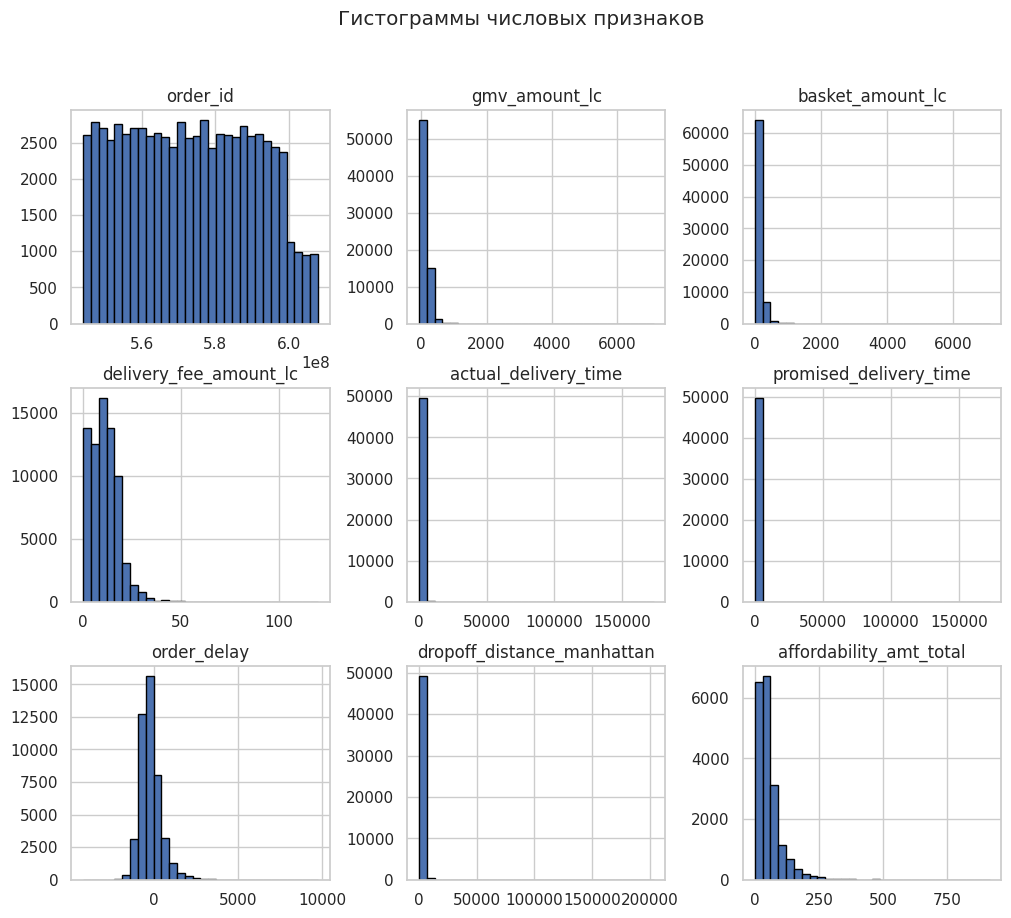

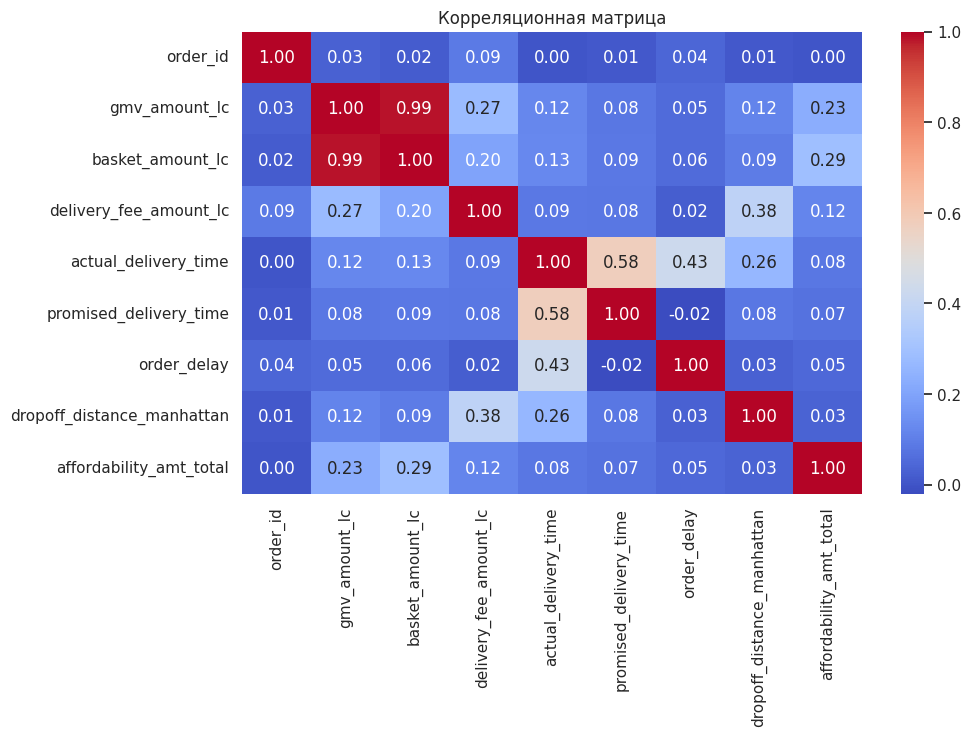

In [6]:
sns.set(style='whitegrid')

df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Гистограммы числовых признаков')
plt.show()

numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

<ipython-input-7-865f23a7def1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["is_successful"], palette="coolwarm")


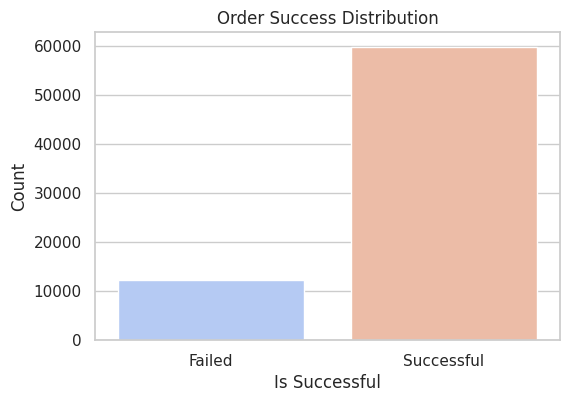

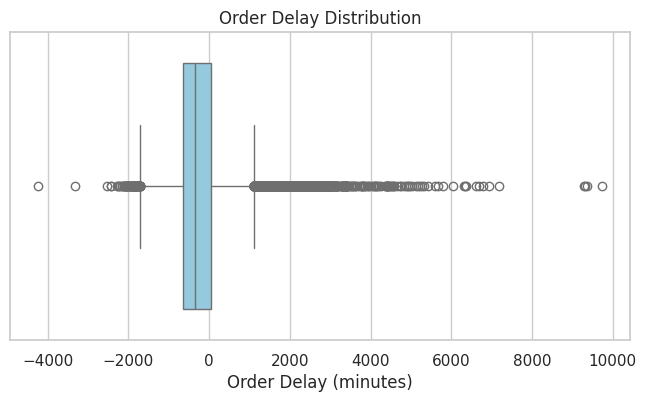

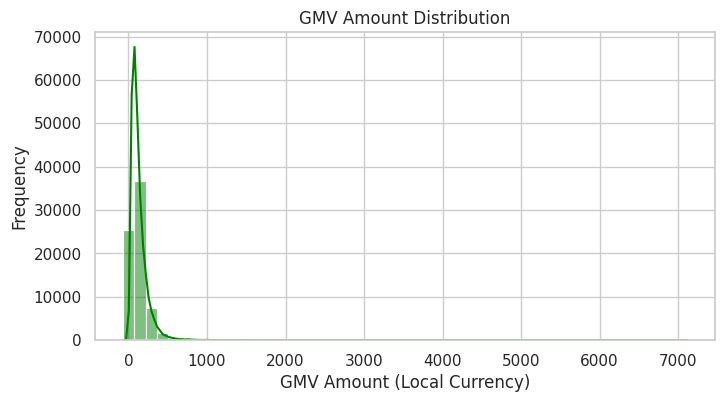

<ipython-input-7-865f23a7def1>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["platform"], order=df["platform"].value_counts().index, palette="viridis")


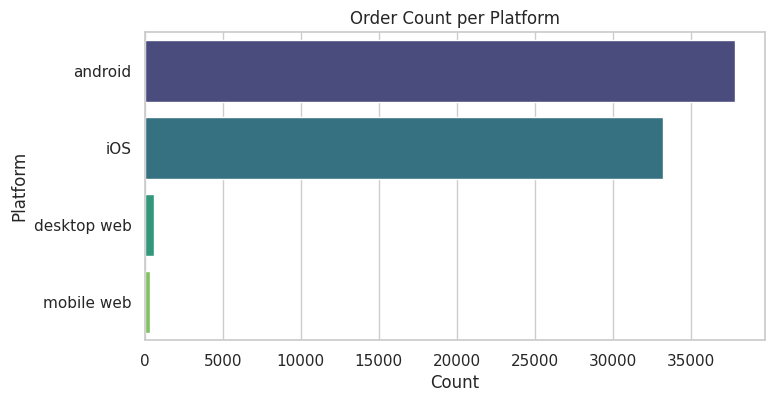

<ipython-input-7-865f23a7def1>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["is_successful"], y=df["dropoff_distance_manhattan"], palette="coolwarm")


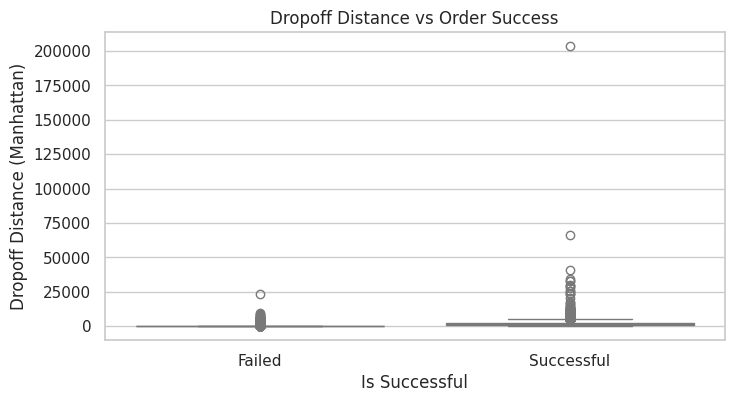

In [7]:
sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x=df["is_successful"], palette="coolwarm")
plt.title("Order Success Distribution")
plt.xlabel("Is Successful")
plt.ylabel("Count")
plt.xticks([0, 1], ["Failed", "Successful"])
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df["order_delay"].dropna(), color="skyblue")
plt.title("Order Delay Distribution")
plt.xlabel("Order Delay (minutes)")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df["gmv_amount_lc"], bins=50, kde=True, color="green")
plt.title("GMV Amount Distribution")
plt.xlabel("GMV Amount (Local Currency)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(y=df["platform"], order=df["platform"].value_counts().index, palette="viridis")
plt.title("Order Count per Platform")
plt.xlabel("Count")
plt.ylabel("Platform")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df["is_successful"], y=df["dropoff_distance_manhattan"], palette="coolwarm")
plt.title("Dropoff Distance vs Order Success")
plt.xlabel("Is Successful")
plt.ylabel("Dropoff Distance (Manhattan)")
plt.xticks([0, 1], ["Failed", "Successful"])
plt.show()


<ipython-input-8-709df6ddd2bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


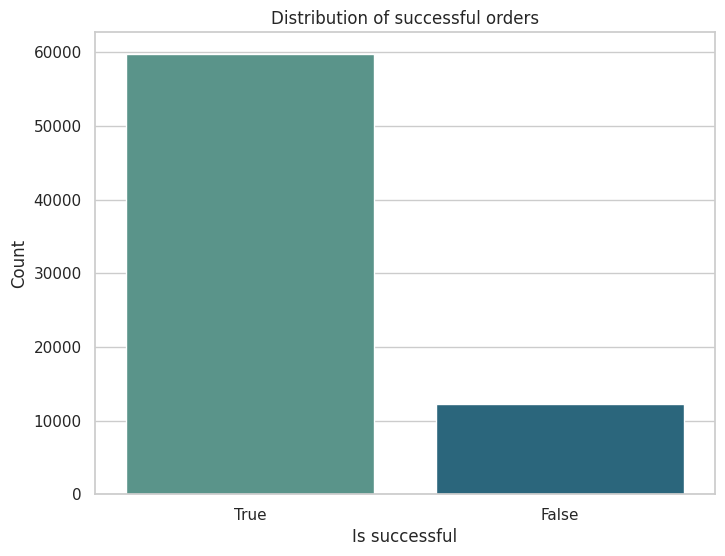

In [8]:
counts = df['is_successful'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Is successful')
plt.ylabel('Count')
plt.title('Distribution of successful orders')
plt.show()

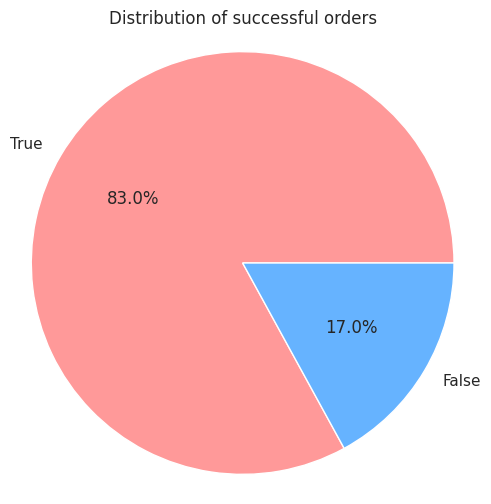

In [9]:
custom_colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(6, 6))
plt.pie(counts.values, labels=counts.index.astype(str), autopct='%1.1f%%', colors=custom_colors)
plt.axis('equal')
plt.title('Distribution of successful orders')
plt.show()

<ipython-input-10-78a9059d4d9b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


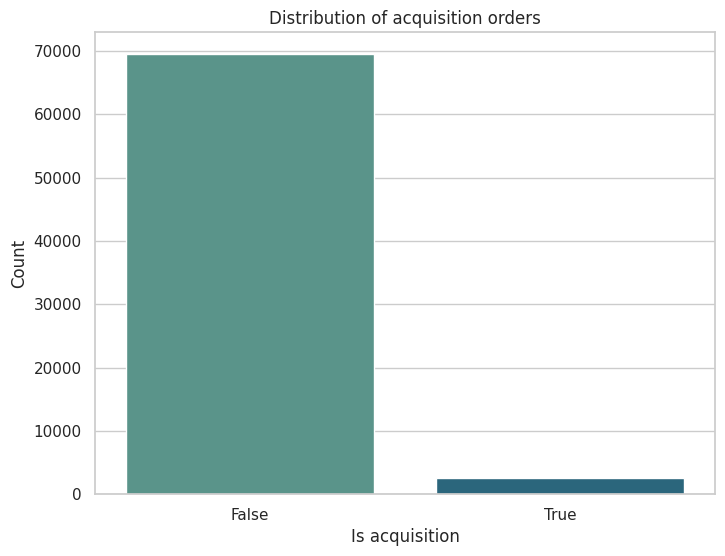

In [10]:
counts = df['is_acquisition'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Is acquisition')
plt.ylabel('Count')
plt.title('Distribution of acquisition orders')
plt.show()

<ipython-input-11-0534b23e154f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


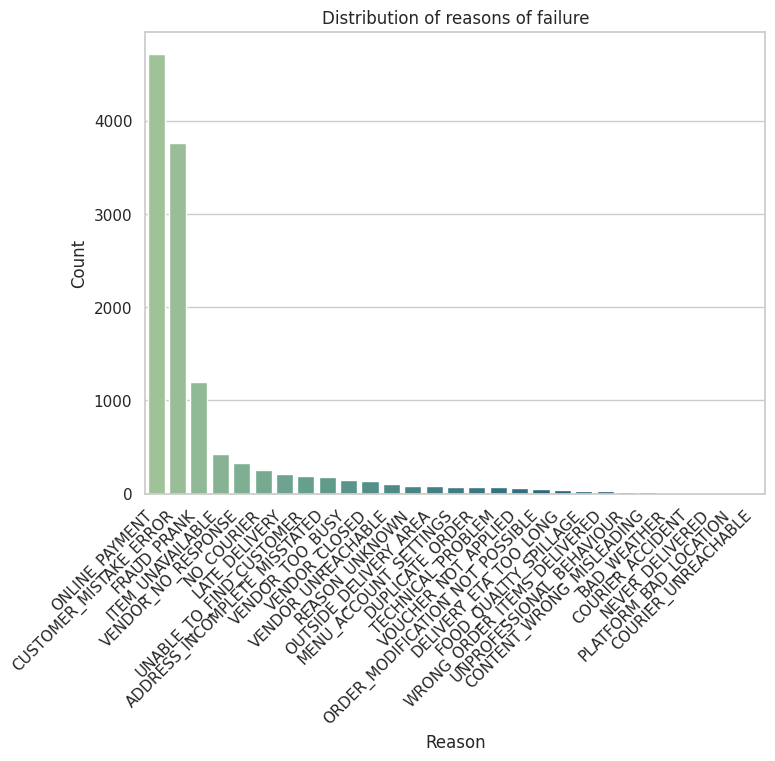

In [11]:
counts = df['reason'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of reasons of failure')
plt.show()

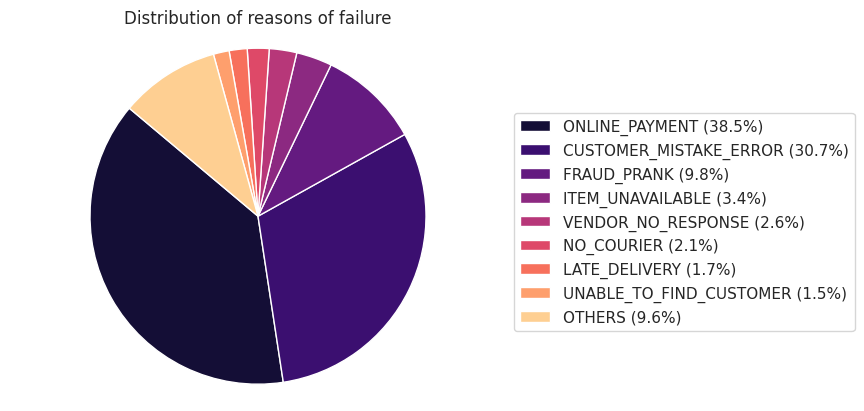

In [12]:
counts = df['reason'].value_counts()
filtered_counts = counts[counts / counts.sum() >= 0.015]
other_count = counts[counts / counts.sum() < 0.015].sum()
filtered_counts['OTHERS'] = other_count
custom_palette = sns.color_palette("magma", len(filtered_counts))

labels = ['{0} ({1:1.1f}%)'.format(i, j) for i, j in zip(filtered_counts.index, filtered_counts.values/filtered_counts.values.sum()*100)]

plt.pie(filtered_counts.values, labels=None, colors=custom_palette, startangle=140)
plt.axis('equal')

plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.8))
plt.title('Distribution of reasons of failure', loc='center')
plt.show()

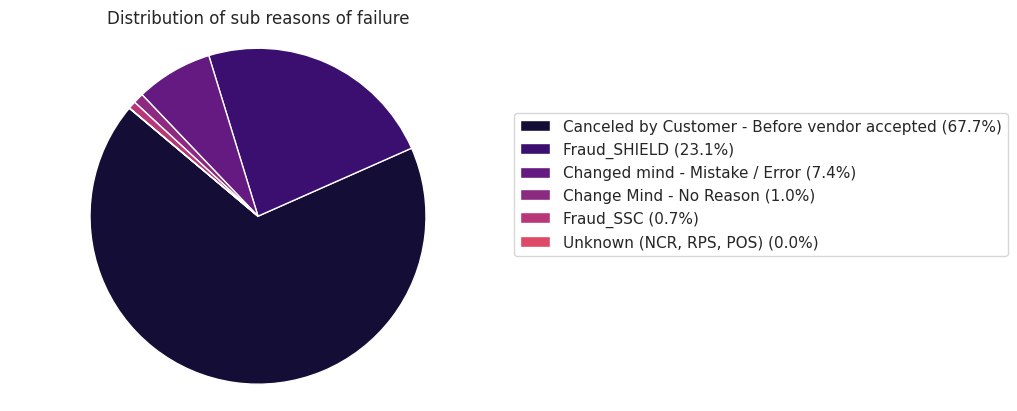

In [13]:
counts = df['sub_reason'].value_counts()
custom_palette = sns.color_palette("magma", len(filtered_counts))

labels = ['{0} ({1:1.1f}%)'.format(i, j) for i, j in zip(counts.index, counts.values/counts.values.sum()*100)]

plt.pie(counts.values, labels=None, colors=custom_palette, startangle=140)
plt.axis('equal')

plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.8))
plt.title('Distribution of sub reasons of failure', loc='center')
plt.show()

<ipython-input-14-d1489263f32c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


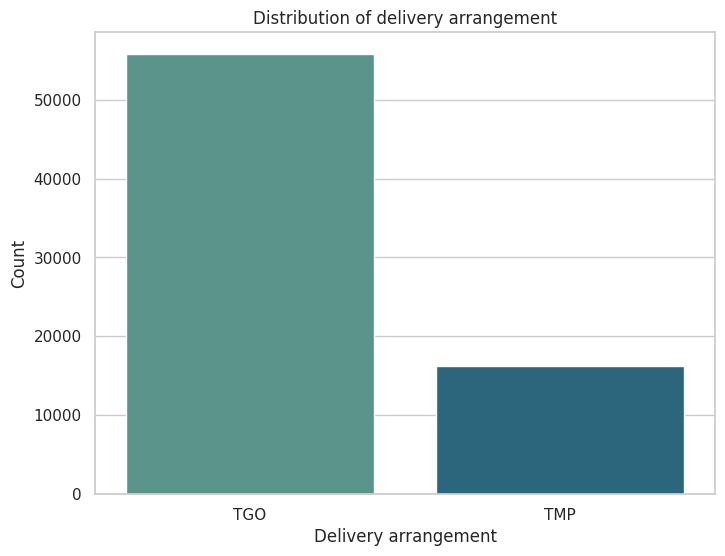

In [14]:
counts = df['delivery_arrangement'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Delivery arrangement')
plt.ylabel('Count')
plt.title('Distribution of delivery arrangement')
plt.show()

<ipython-input-15-5a0de3f98b2f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


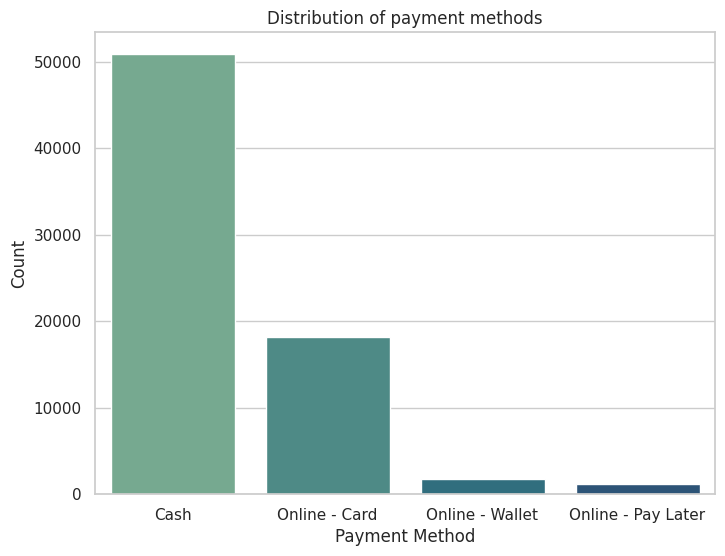

In [15]:
counts = df['Payment Method'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of payment methods')
plt.show()

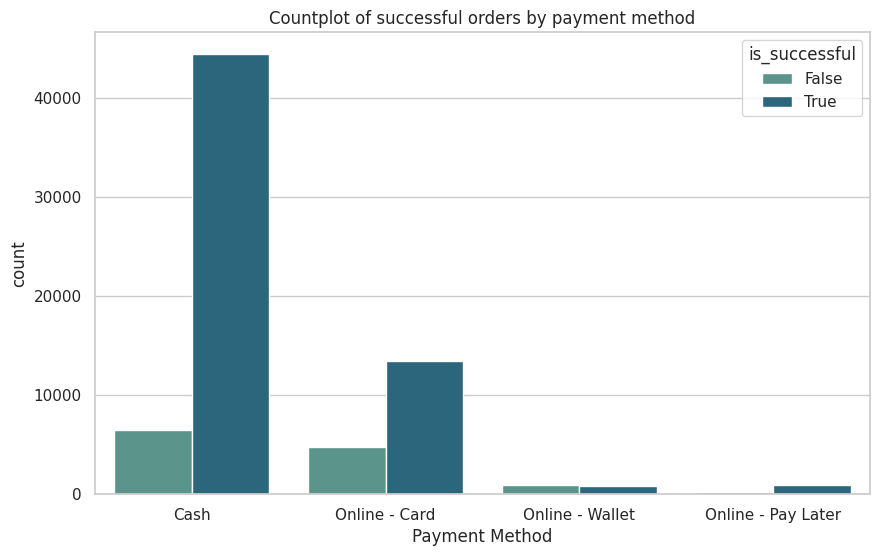

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Payment Method", hue="is_successful", data=df, palette = 'crest')
plt.title('Countplot of successful orders by payment method')
plt.show()

<ipython-input-17-f8b6103f8e5d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


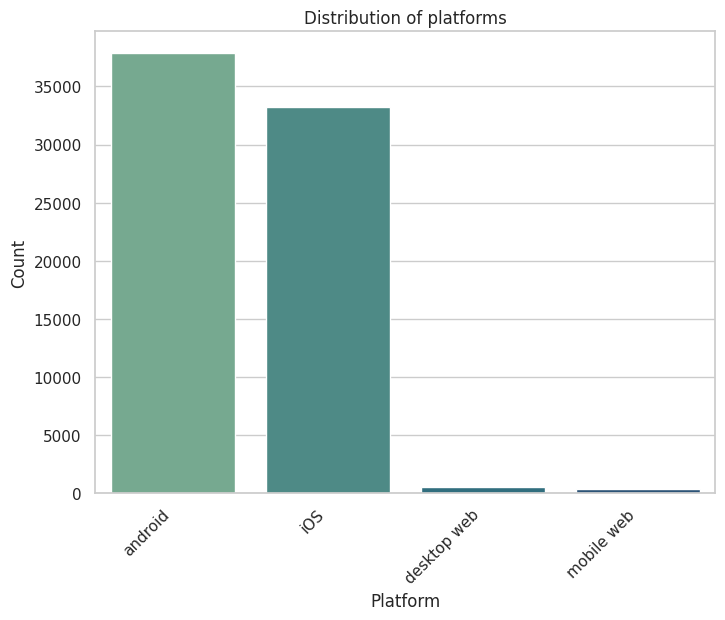

In [17]:
counts = df['platform'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of platforms')
plt.show()

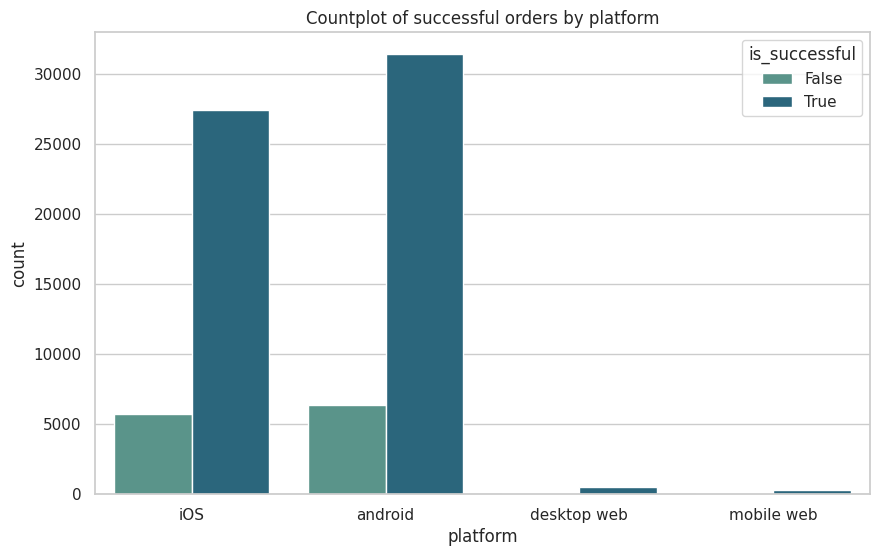

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="platform", hue="is_successful", data=df, palette = 'crest')
plt.title('Countplot of successful orders by platform')
plt.show()

<ipython-input-19-ea830571a6bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


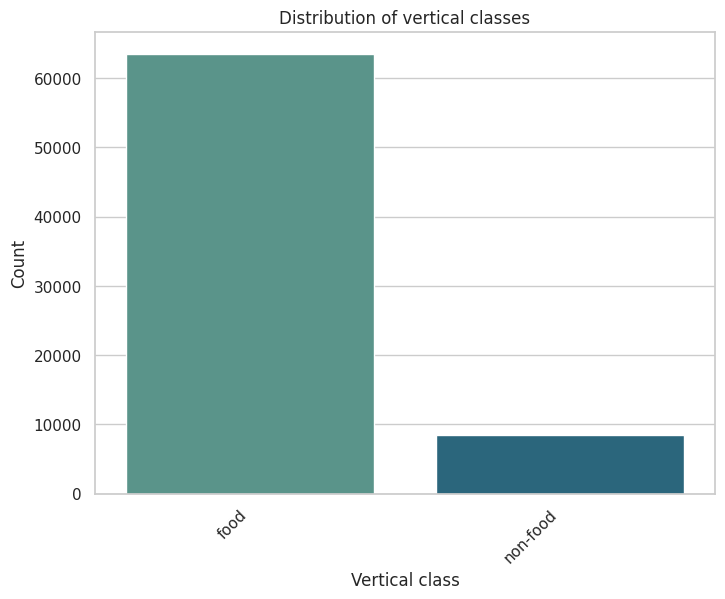

In [19]:
counts = df['vertical_class'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Vertical class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of vertical classes')
plt.show()

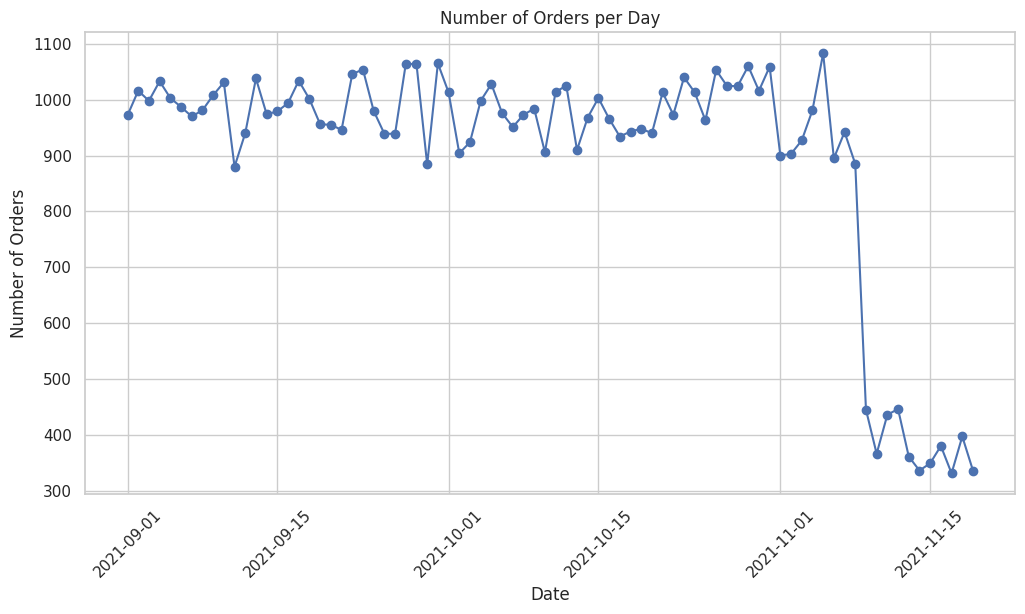

In [20]:
df['order_time'] = pd.to_datetime(df['order_time'])
df['order_day'] = df['order_time'].dt.date
num_orders_per_day = df.groupby('order_day')['order_id'].count()
plt.figure(figsize=(12, 6))
plt.plot(num_orders_per_day.index, num_orders_per_day.values, marker='o', color='b', label='Number of Orders')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

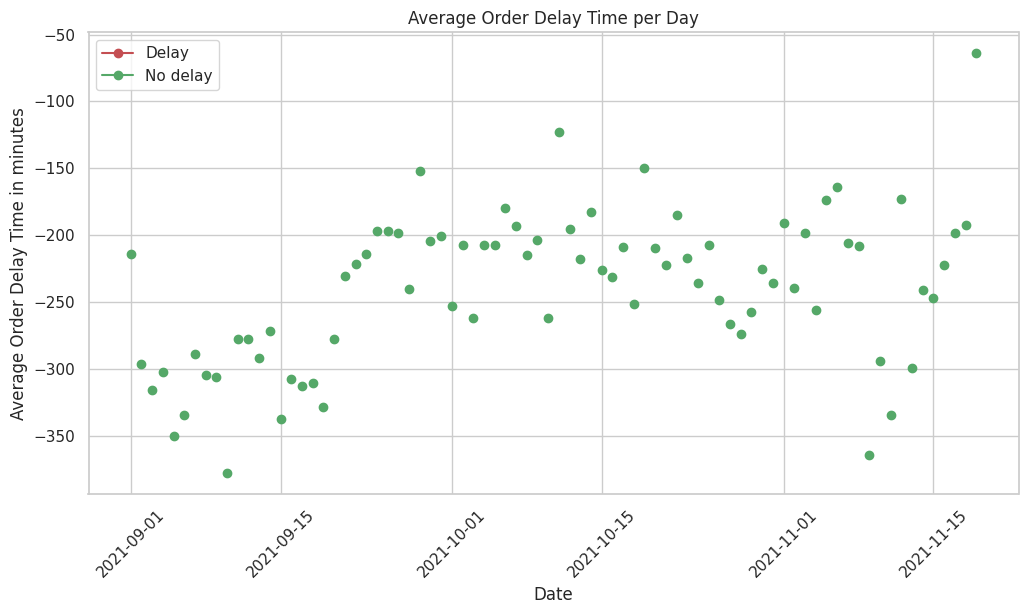

In [21]:
plt.figure(figsize=(12, 6))
avg_delay_per_day = df.groupby('order_day')['order_delay'].mean()
for day, value in avg_delay_per_day.items():
    color = 'r' if value > 0 else 'g'
    plt.plot(day, value, marker='o', color=color)
plt.xlabel('Date')
plt.ylabel('Average Order Delay Time in minutes')
plt.title('Average Order Delay Time per Day')
plt.xticks(rotation=45)
plt.plot([], marker='o', color='r', label='Delay')
plt.plot([], marker='o', color='g', label='No delay')
plt.legend()
plt.grid(True)
plt.show()

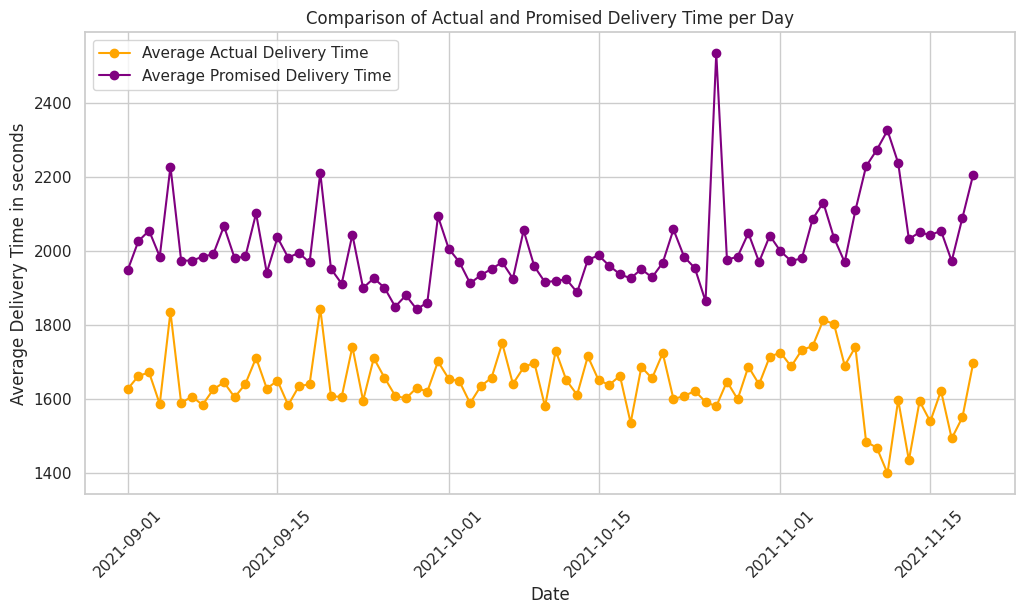

In [25]:
avg_actual_delivery_time_per_day = df.groupby('order_day')['actual_delivery_time'].mean()

avg_promised_delivery_time_per_day = df.groupby('order_day')['promised_delivery_time'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_actual_delivery_time_per_day.index, avg_actual_delivery_time_per_day.values, marker='o', color='orange', label='Average Actual Delivery Time')
plt.plot(avg_promised_delivery_time_per_day.index, avg_promised_delivery_time_per_day.values, marker='o', color='purple', label='Average Promised Delivery Time')
plt.xlabel('Date')
plt.ylabel('Average Delivery Time in seconds')
plt.title('Comparison of Actual and Promised Delivery Time per Day')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-24-7d837fc115aa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')


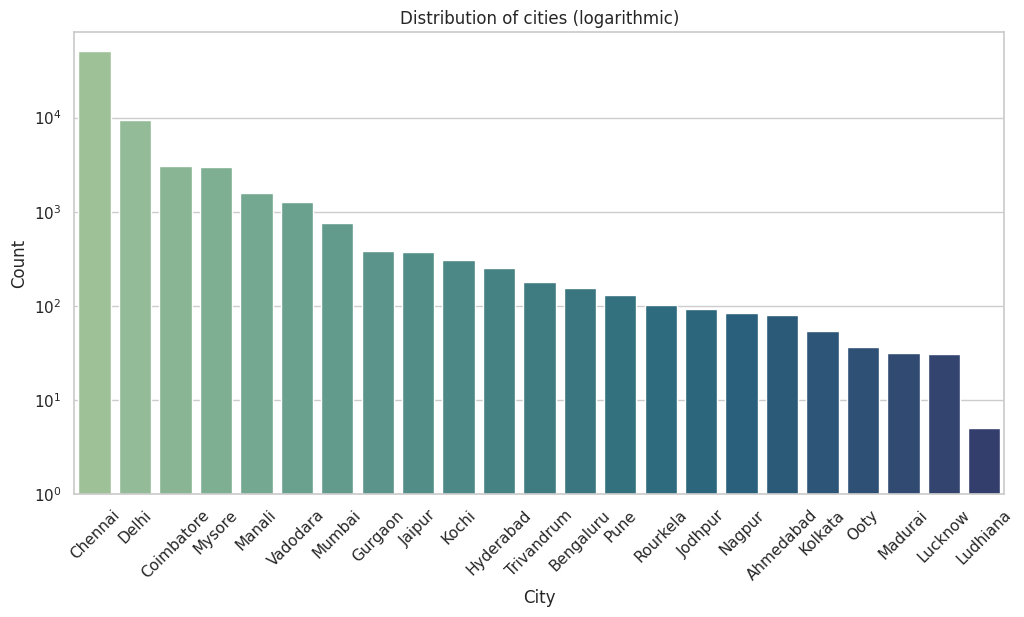

In [24]:
counts = df['City'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of cities (logarithmic)')
plt.yscale('log')
plt.ylim(1, None)
plt.xticks(rotation=45)
plt.show()

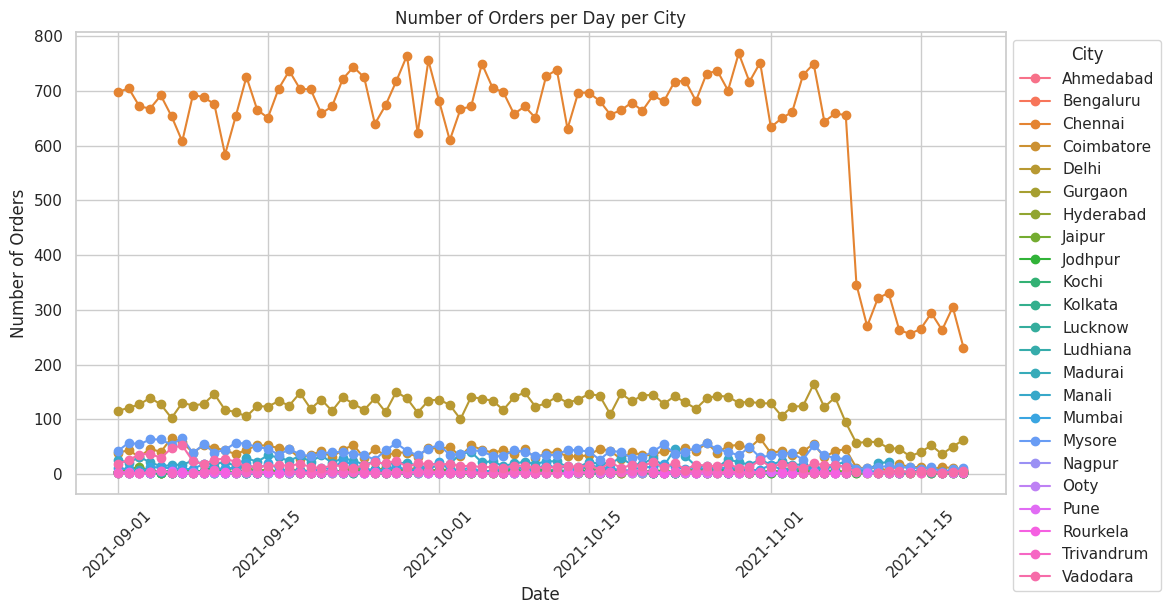

In [26]:
orders_per_day_per_city = df.groupby(['order_day', 'City']).size().unstack()

plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', n_colors=len(orders_per_day_per_city.columns))

for i, city in enumerate(orders_per_day_per_city.columns):
    plt.plot(orders_per_day_per_city.index, orders_per_day_per_city[city], marker='o', label=city, color=colors[i])

plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Day per City')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

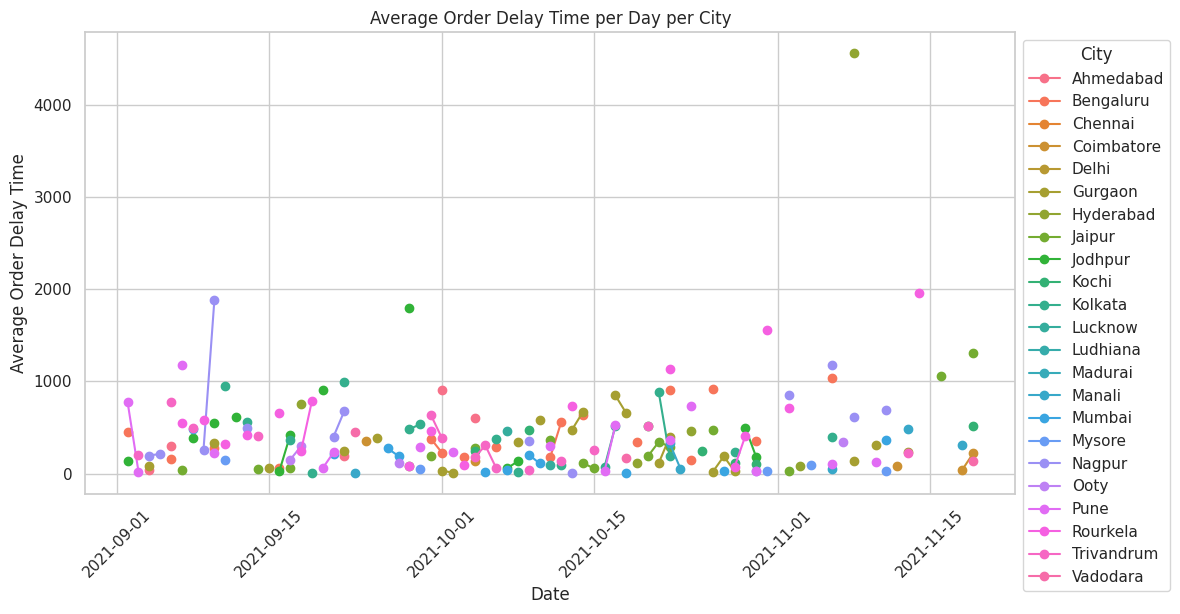

In [27]:
avg_delay_per_day_per_city = df.groupby(['order_day', 'City'])['order_delay'].mean().unstack()
avg_delay_per_day_per_city_filtered = avg_delay_per_day_per_city[avg_delay_per_day_per_city > 0]
plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', n_colors=len(avg_delay_per_day_per_city.columns))
for i, city in enumerate(avg_delay_per_day_per_city_filtered.columns):
    plt.plot(avg_delay_per_day_per_city_filtered.index, avg_delay_per_day_per_city_filtered[city], marker='o', label=city, color=colors[i])

plt.xlabel('Date')
plt.ylabel('Average Order Delay Time')
plt.title('Average Order Delay Time per Day per City')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

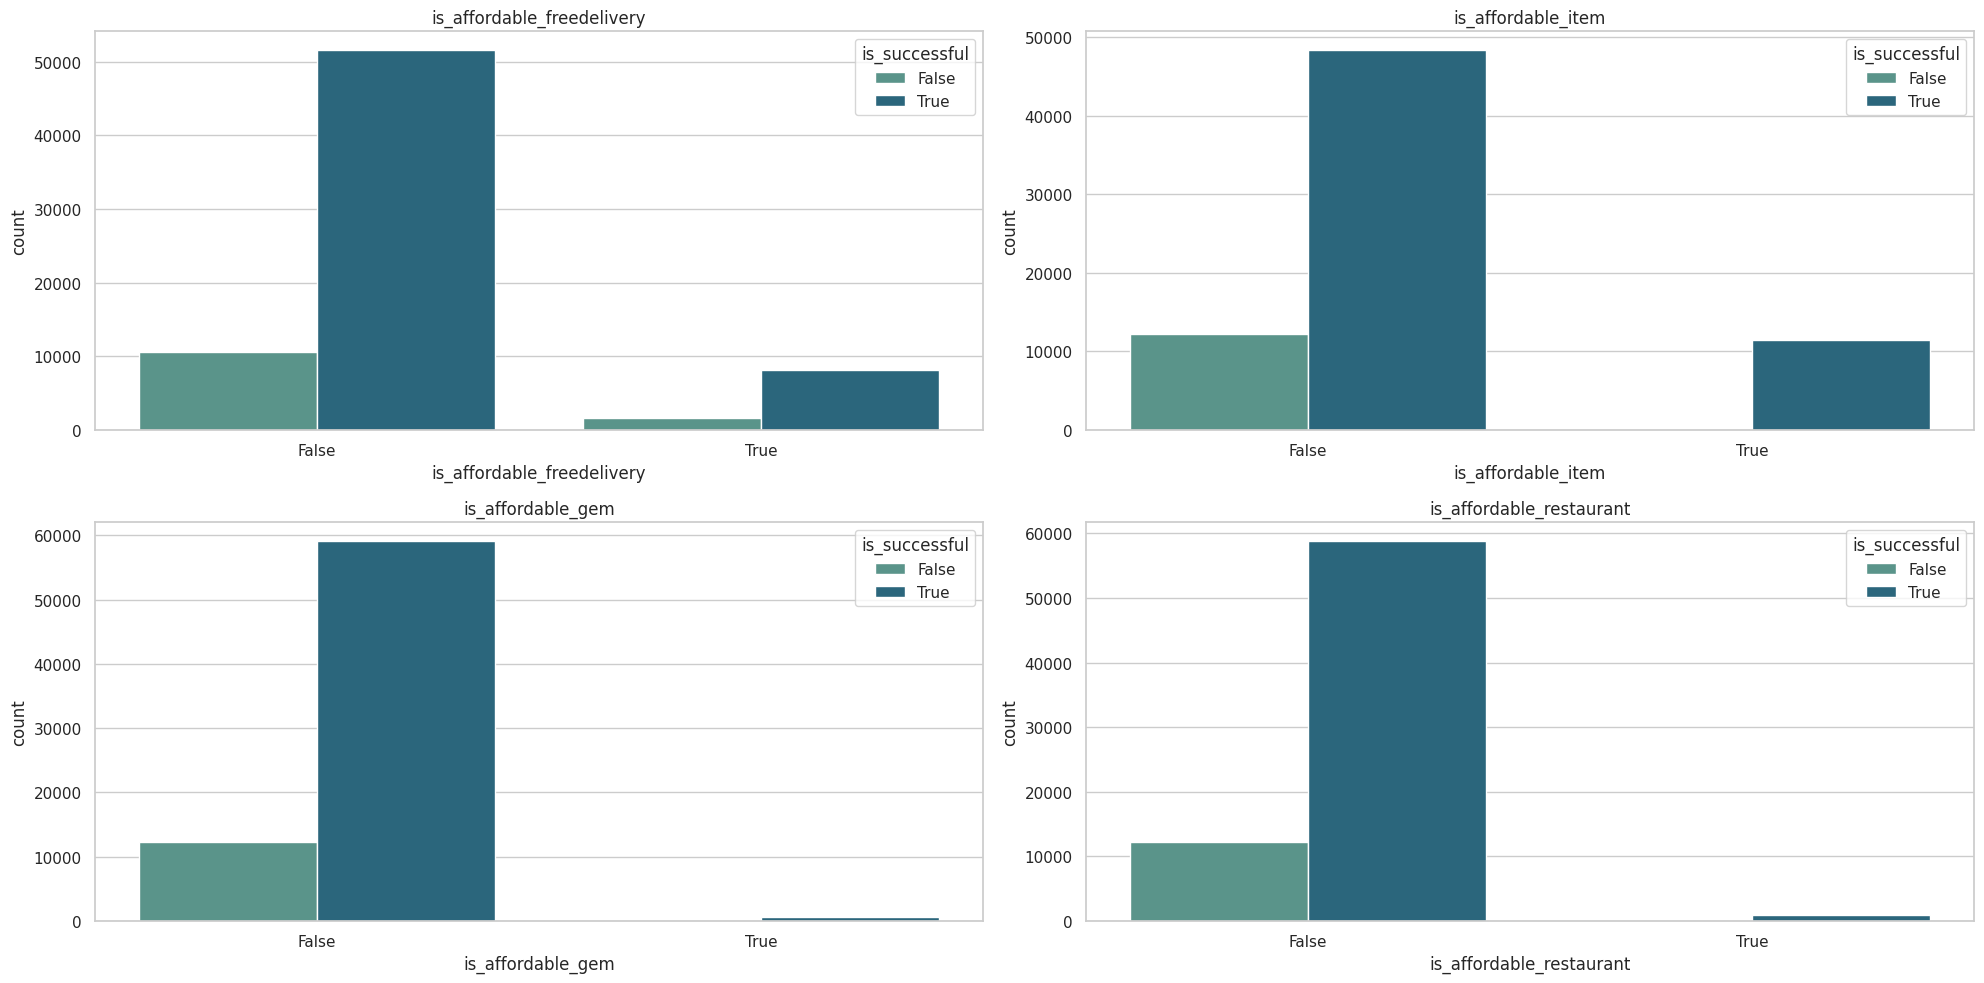

In [28]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

plt.subplot(221)
sns.countplot(x="is_affordable_freedelivery", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_freedelivery')

plt.subplot(222)
sns.countplot(x="is_affordable_item", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_item')

plt.subplot(223)
sns.countplot(x="is_affordable_gem", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_gem')

plt.subplot(224)
sns.countplot(x="is_affordable_restaurant", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_restaurant')

plt.tight_layout()
plt.show()

In [29]:
import plotly.express as px

In [31]:
city_coordinates = {
    'Ahmedabad': {'lat': 23.0225, 'lon': 72.5714},
    'Bengaluru': {'lat': 12.9716, 'lon': 77.5946},
    'Chennai': {'lat': 13.0827, 'lon': 80.2707},
    'Coimbatore': {'lat': 11.0168, 'lon': 76.9558},
    'Delhi': {'lat': 28.6139, 'lon': 77.209},
    'Gurgaon': {'lat': 28.4595, 'lon': 77.0266},
    'Hyderabad': {'lat': 17.385, 'lon': 78.4867},
    'Jaipur': {'lat': 26.9124, 'lon': 75.7873},
    'Jodhpur': {'lat': 26.2389, 'lon': 73.0243},
    'Kochi': {'lat': 9.9312, 'lon': 76.2673},
    'Kolkata': {'lat': 22.5726, 'lon': 88.3639},
    'Lucknow': {'lat': 26.8467, 'lon': 80.9462},
    'Ludhiana': {'lat': 30.901, 'lon': 75.8573},
    'Madurai': {'lat': 9.9252, 'lon': 78.1198},
    'Manali': {'lat': 32.2396, 'lon': 77.1887},
    'Mumbai': {'lat': 19.076, 'lon': 72.8777},
    'Mysore': {'lat': 12.2958, 'lon': 76.6394},
    'Nagpur': {'lat': 21.1458, 'lon': 79.0882},
    'Ooty': {'lat': 11.4067, 'lon': 76.6932},
    'Pune': {'lat': 18.5204, 'lon': 73.8567},
    'Rourkela': {'lat': 22.2587, 'lon': 84.9011},
    'Trivandrum': {'lat': 8.5241, 'lon': 76.9366},
    'Vadodara': {'lat': 22.3072, 'lon': 73.1812}
}

orders_per_city = df.groupby('City')['order_id'].count().reset_index()
orders_per_city.columns = ['City', 'Number_of_Orders']

orders_per_city['lat'] = orders_per_city['City'].apply(lambda x: city_coordinates[x]['lat'])
orders_per_city['lon'] = orders_per_city['City'].apply(lambda x: city_coordinates[x]['lon'])

fig = px.scatter_mapbox(orders_per_city, lat="lat", lon="lon", hover_name="City", hover_data=["Number_of_Orders"],
                        size="Number_of_Orders", color="Number_of_Orders", size_max=50,
                        mapbox_style="carto-positron", zoom=4, title='Number of Orders per City in India')
fig.show()

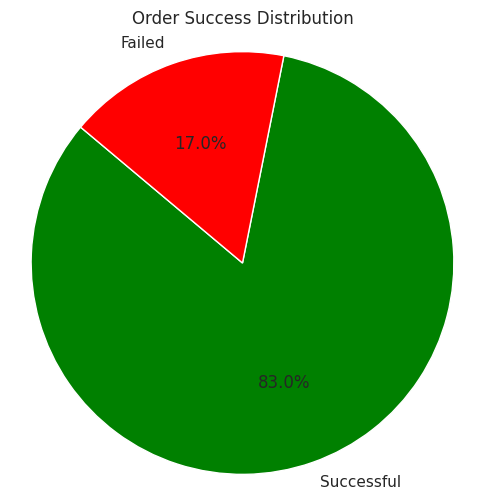

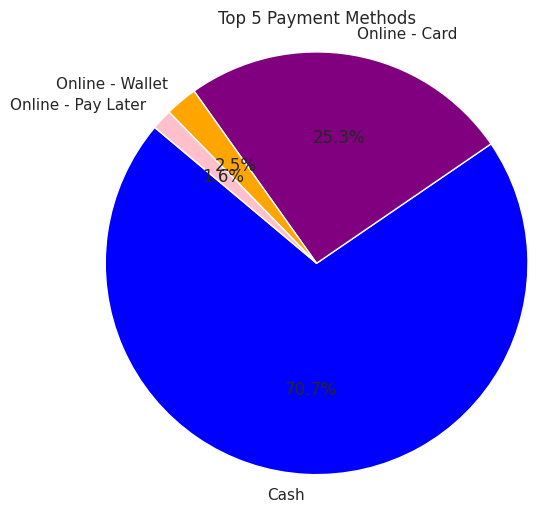

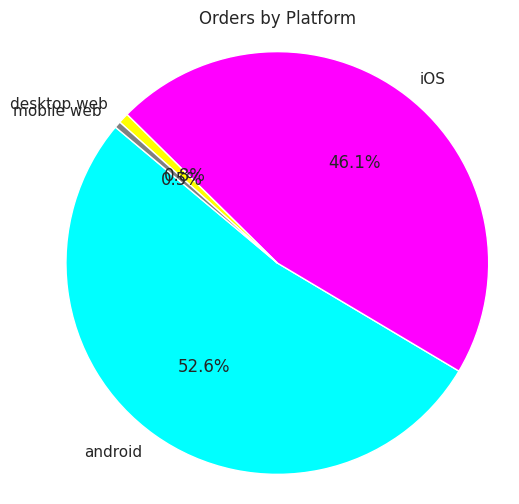

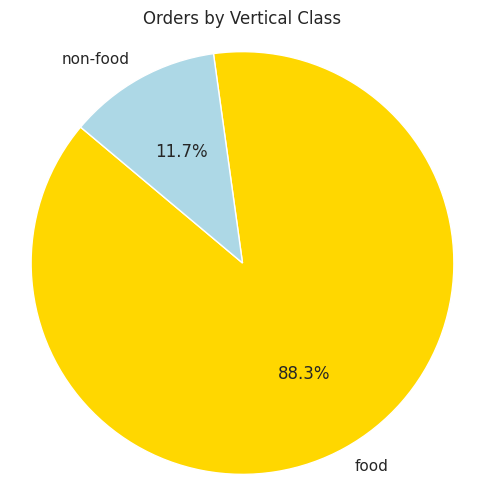

In [33]:
def plot_pie(data, labels, title, colors=None):
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

success_counts = df["is_successful"].value_counts()
plot_pie(success_counts, labels=["Successful", "Failed"], title="Order Success Distribution", colors=["green", "red"])

payment_counts = df["Payment Method"].value_counts().nlargest(5)  # Top 5 payment methods
plot_pie(payment_counts, labels=payment_counts.index, title="Top 5 Payment Methods", colors=["blue", "purple", "orange", "pink", "gray"])

platform_counts = df["platform"].value_counts()
plot_pie(platform_counts, labels=platform_counts.index, title="Orders by Platform", colors=["cyan", "magenta", "yellow", "gray"])

vertical_counts = df["vertical_class"].value_counts()
plot_pie(vertical_counts, labels=vertical_counts.index, title="Orders by Vertical Class", colors=["gold", "lightblue", "lightgreen", "salmon"])

<ipython-input-35-1dd533c470d2>:52: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



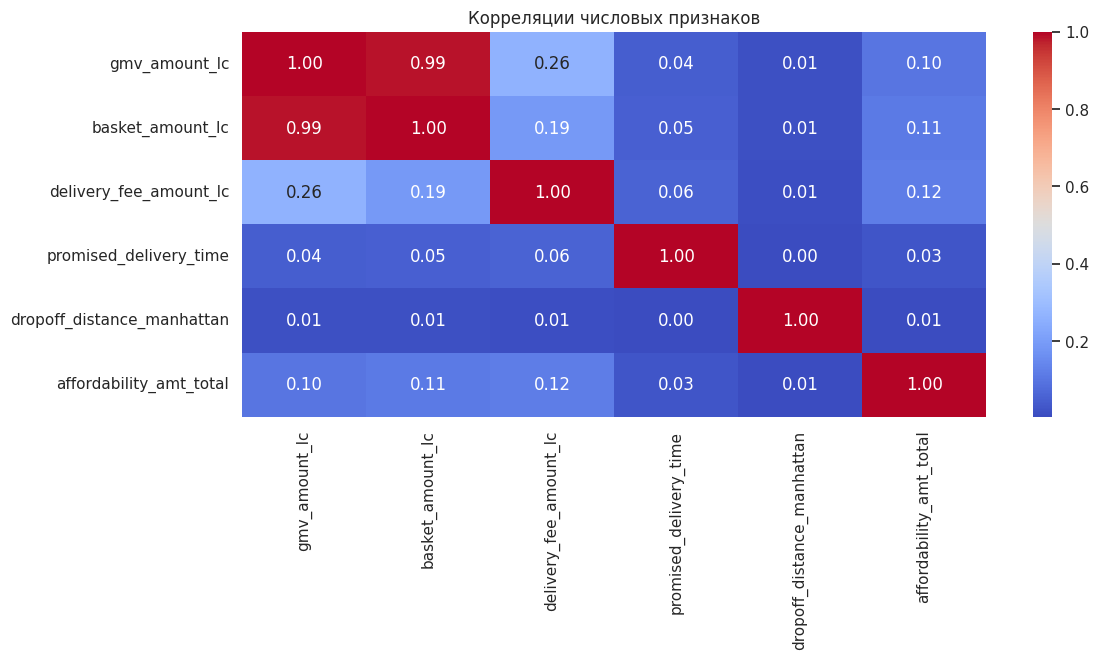

RandomForest без подбора параметров:
Accuracy: 0.9929, Precision: 0.9939, Recall: 0.9976, F1: 0.9957



In [ ]:
# Импорт scikit-learn инструментов
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, precision_recall_curve)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Импорт инструментов для борьбы с дисбалансом
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.ensemble import EasyEnsembleClassifier

# Импорт XGBoost при необходимости
from xgboost import XGBClassifier

# Импорт TensorFlow для нейронной сети
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ---------------------------------------------
# 2. Загрузка и первичная обработка данных
# ---------------------------------------------
data_path = '/content/delivery.csv'
df = pd.read_csv(data_path)

# Удалим некоторые неиспользуемые поля (аналогично исходному коду)
columns_to_remove = [
    'analytical_customer_id', 'reason', 'sub_reason', 'order_id', 'order_time',
    'owner', 'is_acquisition', 'actual_delivery_time', 'order_delay'
]
for col in columns_to_remove:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# ---------------------------------------------
# 3. Очистка пропусков и приведение типов
# ---------------------------------------------
df.fillna(method='ffill', inplace=True)

def convert_str_to_float(x):
    if isinstance(x, str):
        return float(x.replace(',', '.'))
    return x

to_numeric_cols = [
    'dropoff_distance_manhattan', 'delivery_fee_amount_lc', 'gmv_amount_lc',
    'basket_amount_lc', 'affordability_amt_total'
]
for col in to_numeric_cols:
    if col in df.columns:
        df[col] = df[col].apply(convert_str_to_float)

# Удаляем строки, если в целевом признаке есть пропуски
if 'is_successful' in df.columns:
    df.dropna(subset=['is_successful'], inplace=True)

# ---------------------------------------------
# 4. Преобразование категориальных признаков
# ---------------------------------------------
categorical_features = [
    'platform', 'vertical_class', 'vertical', 'City', 'Payment Method', 'delivery_arrangement'
]
for cat_col in categorical_features:
    if cat_col in df.columns and df[cat_col].dtype == 'object':
        dummies = pd.get_dummies(df[cat_col], prefix=cat_col)
        df = pd.concat([df, dummies], axis=1)
        df.drop(cat_col, axis=1, inplace=True)

# ---------------------------------------------
# 5. Подготовка данных для моделей
# ---------------------------------------------
if 'is_successful' not in df.columns:
    raise ValueError("Не найден столбец 'is_successful' в данных.")

X = df.drop('is_successful', axis=1)
y = df['is_successful']

# Создаём обучающую (train) и тестовую (test) выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

# ---------------------------------------------
# 6. Анализ корреляции (пример)
# ---------------------------------------------
num_columns = X.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[num_columns]
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляции числовых признаков')
plt.show()

# ---------------------------------------------
# 7. Модель RandomForest с подбором параметров
# ---------------------------------------------

# 7.1 Обучение без подбора гиперпараметров
basic_rf = RandomForestClassifier(random_state=42)
basic_rf.fit(X_train, y_train)

pred_basic = basic_rf.predict(X_test)

acc_basic = accuracy_score(y_test, pred_basic)
prec_basic = precision_score(y_test, pred_basic)
rec_basic = recall_score(y_test, pred_basic)
f1_basic = f1_score(y_test, pred_basic)

print("RandomForest без подбора параметров:")
print(f"Accuracy: {acc_basic:.4f}, Precision: {prec_basic:.4f}, Recall: {rec_basic:.4f}, F1: {f1_basic:.4f}\n")

# 7.2 GridSearchCV
forest_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                         param_grid=forest_grid,
                         cv=5,
                         scoring='accuracy')
search_rf.fit(X_train, y_train)

print("Лучшие параметры RF:", search_rf.best_params_)
best_rf = search_rf.best_estimator_

cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5)
print("Средняя точность на кросс-валидации RF: {:.4f}".format(cv_scores_rf.mean()))

pred_best_rf = best_rf.predict(X_test)
acc_best_rf = accuracy_score(y_test, pred_best_rf)
prec_best_rf = precision_score(y_test, pred_best_rf)
rec_best_rf = recall_score(y_test, pred_best_rf)
f1_best_rf = f1_score(y_test, pred_best_rf)

print("Оценки лучшего RF-моделя на тесте:")
print(f"Accuracy: {acc_best_rf:.4f}, Precision: {prec_best_rf:.4f}, Recall: {rec_best_rf:.4f}, F1: {f1_best_rf:.4f}\n")

# 7.3 Учёт несбалансированности классов
balanced_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)
balanced_rf.fit(X_train, y_train)

cv_balanced_scores = cross_val_score(balanced_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Средняя точность RF (учёт баланса классов): {:.4f}".format(cv_balanced_scores.mean()))

pred_balanced = balanced_rf.predict(X_test)
proba_balanced = balanced_rf.predict_proba(X_test)[:, 1]

acc_bal = accuracy_score(y_test, pred_balanced)
prec_bal = precision_score(y_test, pred_balanced)
rec_bal = recall_score(y_test, pred_balanced)
f1_bal = f1_score(y_test, pred_balanced)
auroc_bal = roc_auc_score(y_test, proba_balanced)

print("Метрики RF (учёт баланса классов) на тесте:")
print(f"Accuracy: {acc_bal:.4f}, Precision: {prec_bal:.4f}, Recall: {rec_bal:.4f}, F1: {f1_bal:.4f}, AUROC: {auroc_bal:.4f}\n")

# 7.4 Поиск оптимального порога по F1
rf_custom = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
rf_custom.fit(X_train, y_train)
proba_custom = rf_custom.predict_proba(X_test)[:, 1]

prec_vals, rec_vals, thr_vals = precision_recall_curve(y_test, proba_custom)
f1_vals = 2 * prec_vals * rec_vals / (prec_vals + rec_vals)
best_thr_index = np.argmax(f1_vals)
optimal_threshold = thr_vals[best_thr_index]

print("Наилучший порог по F1 для RF:", optimal_threshold)

custom_pred = (proba_custom >= optimal_threshold).astype(int)

acc_custom = accuracy_score(y_test, custom_pred)
prec_custom = precision_score(y_test, custom_pred)
rec_custom = recall_score(y_test, custom_pred)
f1_custom = f1_score(y_test, custom_pred)
auroc_custom = roc_auc_score(y_test, proba_custom)

print("Итоговые метрики RF с кастомным порогом:")
print(f"Accuracy: {acc_custom:.4f}, Precision: {prec_custom:.4f}, Recall: {rec_custom:.4f}, F1: {f1_custom:.4f}, AUROC: {auroc_custom:.4f}\n")

# 7.5 Важность признаков
feature_importances = rf_custom.feature_importances_
feat_imp_dict = {}
for feat_name, imp_val in zip(X_train.columns, feature_importances):
    if imp_val > 0.0005:
        feat_imp_dict[feat_name] = imp_val

df_feat_importances = (pd
    .DataFrame.from_dict(feat_imp_dict, orient='index')
    .rename(columns={0: 'Importance'})
    .sort_values(by='Importance', ascending=False)
    .reset_index()
    .rename(columns={'index': 'Feature'}))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_feat_importances)
plt.title('Значимость признаков в RF')
plt.show()

# ---------------------------------------------
# 8. Модель Logistic Regression
# ---------------------------------------------
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

logreg_pred = logreg_model.predict(X_test)
logreg_prob = logreg_model.predict_proba(X_test)[:, 1]

lr_acc = accuracy_score(y_test, logreg_pred)
lr_prec = precision_score(y_test, logreg_pred)
lr_rec = recall_score(y_test, logreg_pred)
lr_f1 = f1_score(y_test, logreg_pred)
lr_auroc = roc_auc_score(y_test, logreg_prob)

print("Метрики для логистической регрессии (без доп. настроек):")
print(f"Accuracy: {lr_acc:.4f}, Precision: {lr_prec:.4f}, Recall: {lr_rec:.4f}, F1: {lr_f1:.4f}, AUROC: {lr_auroc:.4f}\n")

# С Pipeline и StandardScaler, подбор оптимального порога
from sklearn.pipeline import make_pipeline

lr_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, class_weight='balanced')
)
lr_pipeline.fit(X_train, y_train)

lr_prob = lr_pipeline.predict_proba(X_test)[:, 1]

p_vals, r_vals, thr_lr = precision_recall_curve(y_test, lr_prob)
f1_array = 2 * p_vals * r_vals / (p_vals + r_vals)
best_idx_lr = np.argmax(f1_array)
best_thr_lr = thr_lr[best_idx_lr]

lr_final_pred = (lr_prob >= best_thr_lr).astype(int)

acc_lr_final = accuracy_score(y_test, lr_final_pred)
prec_lr_final = precision_score(y_test, lr_final_pred)
rec_lr_final = recall_score(y_test, lr_final_pred)
f1_lr_final = f1_score(y_test, lr_final_pred)
auroc_lr_final = roc_auc_score(y_test, lr_prob)

print("Логистическая регрессия (баланс классов, Scale, оптимальный порог):")
print(f"Лучший порог: {best_thr_lr:.2f}")
print(f"Accuracy: {acc_lr_final:.4f}, Precision: {prec_lr_final:.4f}, Recall: {rec_lr_final:.4f}, "
      f"F1: {f1_lr_final:.4f}, AUROC: {auroc_lr_final:.4f}\n")

# ---------------------------------------------
# 9. GradientBoostingClassifier
# ---------------------------------------------
gbc_base = GradientBoostingClassifier(random_state=42)
gbc_base.fit(X_train, y_train)

gbc_pred = gbc_base.predict(X_test)
gbc_prob = gbc_base.predict_proba(X_test)[:, 1]

acc_gbc = accuracy_score(y_test, gbc_pred)
prec_gbc = precision_score(y_test, gbc_pred)
rec_gbc = recall_score(y_test, gbc_pred)
f1_gbc = f1_score(y_test, gbc_pred)
auc_gbc = roc_auc_score(y_test, gbc_prob)

print("Базовые метрики GradientBoostingClassifier:")
print(f"Accuracy: {acc_gbc:.4f}, Precision: {prec_gbc:.4f}, Recall: {rec_gbc:.4f}, F1: {f1_gbc:.4f}, AUROC: {auc_gbc:.4f}\n")

# С validation_fraction и т.д.
gbc_tuned = GradientBoostingClassifier(
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=10,
    tol=0.01
)
gbc_tuned.fit(X_train, y_train)

tuned_prob = gbc_tuned.predict_proba(X_test)[:, 1]
tuned_pred = gbc_tuned.predict(X_test)

acc_gbc_tuned = accuracy_score(y_test, tuned_pred)
prec_gbc_tuned = precision_score(y_test, tuned_pred)
rec_gbc_tuned = recall_score(y_test, tuned_pred)
f1_gbc_tuned = f1_score(y_test, tuned_pred)
auc_gbc_tuned = roc_auc_score(y_test, tuned_prob)

print("Тонко настроенный GradientBoostingClassifier:")
print(f"Accuracy: {acc_gbc_tuned:.4f}, Precision: {prec_gbc_tuned:.4f}, Recall: {rec_gbc_tuned:.4f}, "
      f"F1: {f1_gbc_tuned:.4f}, AUROC: {auc_gbc_tuned:.4f}\n")

# Пример использования SMOTE с GBC
X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)
gbc_smote = GradientBoostingClassifier(random_state=42)
gbc_smote.fit(X_train_smote, y_train_smote)

smote_pred = gbc_smote.predict(X_test)
smote_prob = gbc_smote.predict_proba(X_test)[:, 1]

acc_smote = accuracy_score(y_test, smote_pred)
prec_smote = precision_score(y_test, smote_pred)
rec_smote = recall_score(y_test, smote_pred)
f1_smote = f1_score(y_test, smote_pred)
auc_smote = roc_auc_score(y_test, smote_prob)

print("GradientBoostingClassifier с SMOTE:")
print(f"Accuracy: {acc_smote:.4f}, Precision: {prec_smote:.4f}, Recall: {rec_smote:.4f}, "
      f"F1: {f1_smote:.4f}, AUROC: {auc_smote:.4f}\n")

# ---------------------------------------------
# 10. Наивный Байес (GaussianNB)
# ---------------------------------------------
# Пример выбора альтернативного набора столбцов для NB:
alternative_data_nb = df.drop('basket_amount_lc', axis=1, errors='ignore')
X_nb = alternative_data_nb.drop('is_successful', axis=1)
y_nb = alternative_data_nb['is_successful']

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_nb,
    y_nb,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train_nb, y_train_nb)

nb_pred = nb_clf.predict(X_test_nb)
nb_prob = nb_clf.predict_proba(X_test_nb)[:, 1]

acc_nb = accuracy_score(y_test_nb, nb_pred)
prec_nb = precision_score(y_test_nb, nb_pred)
rec_nb = recall_score(y_test_nb, nb_pred)
f1_nb = f1_score(y_test_nb, nb_pred)
auc_nb = roc_auc_score(y_test_nb, nb_prob)

print("GaussianNB (простой) метрики:")
print(f"Accuracy: {acc_nb:.4f}, Precision: {prec_nb:.4f}, Recall: {rec_nb:.4f}, F1: {f1_nb:.4f}, AUROC: {auc_nb:.4f}\n")

# С применением Pipeline и SMOTE/StandardScaler
pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB())
])
X_train_nb_smote, y_train_nb_smote = SMOTE(random_state=42).fit_resample(X_train_nb, y_train_nb)
pipeline_nb.fit(X_train_nb_smote, y_train_nb_smote)

nb_preds_pipeline = pipeline_nb.predict(X_test_nb)
nb_probs_pipeline = pipeline_nb.predict_proba(X_test_nb)[:, 1]

acc_nb_pipe = accuracy_score(y_test_nb, nb_preds_pipeline)
prec_nb_pipe = precision_score(y_test_nb, nb_preds_pipeline)
rec_nb_pipe = recall_score(y_test_nb, nb_preds_pipeline)
f1_nb_pipe = f1_score(y_test_nb, nb_preds_pipeline)
auc_nb_pipe = roc_auc_score(y_test_nb, nb_probs_pipeline)

print("GaussianNB с масштабированием и SMOTE:")
print(f"Accuracy: {acc_nb_pipe:.4f}, Precision: {prec_nb_pipe:.4f}, Recall: {rec_nb_pipe:.4f}, "
      f"F1: {f1_nb_pipe:.4f}, AUROC: {auc_nb_pipe:.4f}\n")

# ---------------------------------------------
# 11. SVC с калибровкой
# ---------------------------------------------
svc_model = SVC(random_state=42, probability=False)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

acc_svc = accuracy_score(y_test, svc_pred)
prec_svc = precision_score(y_test, svc_pred)
rec_svc = recall_score(y_test, svc_pred)
f1_svc = f1_score(y_test, svc_pred)

print("Базовые метрики SVC (без вероятностей):")
print(f"Accuracy: {acc_svc:.4f}, Precision: {prec_svc:.4f}, Recall: {rec_svc:.4f}, F1: {f1_svc:.4f}\n")

# Калибровка и стандартное масштабирование
from sklearn.calibration import CalibratedClassifierCV

svc_pipe = Pipeline([
    ('scaler_svc', StandardScaler()),
    ('svm', SVC(kernel='linear', random_state=42, tol=1e-3))
])

calibrated_svc = CalibratedClassifierCV(svc_pipe, method='sigmoid', cv=3)
calibrated_svc.fit(X_train, y_train)

svc_calibrated_pred = calibrated_svc.predict(X_test)
svc_calibrated_prob = calibrated_svc.predict_proba(X_test)[:, 1]

acc_svc_cal = accuracy_score(y_test, svc_calibrated_pred)
prec_svc_cal = precision_score(y_test, svc_calibrated_pred)
rec_svc_cal = recall_score(y_test, svc_calibrated_pred)
f1_svc_cal = f1_score(y_test, svc_calibrated_pred)
auroc_svc_cal = roc_auc_score(y_test, svc_calibrated_prob)

print("SVC c калибровкой и стандартным масштабированием:")
print(f"Accuracy: {acc_svc_cal:.4f}, Precision: {prec_svc_cal:.4f}, Recall: {rec_svc_cal:.4f}, "
      f"F1: {f1_svc_cal:.4f}, AUROC: {auroc_svc_cal:.4f}\n")

# ---------------------------------------------
# 12. Пример нейронной сети (Keras/TensorFlow)
# ---------------------------------------------
X_train_nn = X_train.values.astype('float32')
X_test_nn = X_test.values.astype('float32')
y_train_nn = y_train.values.astype('float32')
y_test_nn = y_test.values.astype('float32')

nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_nn.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

neg_count = len(y_train_nn) - y_train_nn.sum()
pos_count = y_train_nn.sum()
class_weights = {0: 1.0, 1: (neg_count / pos_count) if pos_count != 0 else 1.0}

nn_history = nn_model.fit(
    X_train_nn,
    y_train_nn,
    epochs=20,
    batch_size=64,
    validation_data=(X_test_nn, y_test_nn),
    class_weight=class_weights,
    verbose=1
)

nn_preds = (nn_model.predict(X_test_nn) > 0.5).astype(int)

acc_nn = accuracy_score(y_test_nn, nn_preds)
prec_nn = precision_score(y_test_nn, nn_preds)
rec_nn = recall_score(y_test_nn, nn_preds)
f1_nn = f1_score(y_test_nn, nn_preds)
roc_nn = roc_auc_score(y_test_nn, nn_preds)

print("\nМетрики нейронной сети:")
print(f"Accuracy: {acc_nn:.4f}, Precision: {prec_nn:.4f}, Recall: {rec_nn:.4f}, F1: {f1_nn:.4f}, AUROC: {roc_nn:.4f}\n")

# ---------------------------------------------
# 13. EasyEnsembleClassifier
# ---------------------------------------------
ee_clf = EasyEnsembleClassifier(n_estimators=5, random_state=42)
ee_clf.fit(X_train, y_train)

ee_pred = ee_clf.predict(X_test)
ee_prob = ee_clf.predict_proba(X_test)[:, 1]

acc_ee = accuracy_score(y_test, ee_pred)
prec_ee = precision_score(y_test, ee_pred)
rec_ee = recall_score(y_test, ee_pred)
f1_ee = f1_score(y_test, ee_pred)
auroc_ee = roc_auc_score(y_test, ee_prob)

print("EasyEnsembleClassifier результаты:")
print(f"Accuracy: {acc_ee:.4f}, Precision: {prec_ee:.4f}, Recall: {rec_ee:.4f}, "
      f"F1: {f1_ee:.4f}, AUROC: {auroc_ee:.4f}\n")

# ---------------------------------------------
# 14. NearMiss (пример для RF / LR / GBC)
# ---------------------------------------------
nm = NearMiss(version=3)
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

# Пример с RF
rf_nm = RandomForestClassifier(random_state=42)
rf_nm.fit(X_train_nm, y_train_nm)
rf_nm_pred = rf_nm.predict(X_test)
rf_nm_prob = rf_nm.predict_proba(X_test)[:, 1]

acc_nm_rf = accuracy_score(y_test, rf_nm_pred)
prec_nm_rf = precision_score(y_test, rf_nm_pred)
rec_nm_rf = recall_score(y_test, rf_nm_pred)
f1_nm_rf = f1_score(y_test, rf_nm_pred)
auroc_nm_rf = roc_auc_score(y_test, rf_nm_prob)

print("NearMiss + RandomForest:")
print(f"Accuracy: {acc_nm_rf:.4f}, Precision: {prec_nm_rf:.4f}, Recall: {rec_nm_rf:.4f}, "
      f"F1: {f1_nm_rf:.4f}, AUROC: {auroc_nm_rf:.4f}\n")

# Пример с LogisticRegression
lr_nm = LogisticRegression(random_state=42)
lr_nm.fit(X_train_nm, y_train_nm)
lr_nm_pred = lr_nm.predict(X_test)
lr_nm_prob = lr_nm.predict_proba(X_test)[:, 1]

acc_nm_lr = accuracy_score(y_test, lr_nm_pred)
prec_nm_lr = precision_score(y_test, lr_nm_pred)
rec_nm_lr = recall_score(y_test, lr_nm_pred)
f1_nm_lr = f1_score(y_test, lr_nm_pred)
auroc_nm_lr = roc_auc_score(y_test, lr_nm_prob)

print("NearMiss + LogisticRegression:")
print(f"Accuracy: {acc_nm_lr:.4f}, Precision: {prec_nm_lr:.4f}, Recall: {rec_nm_lr:.4f}, "
      f"F1: {f1_nm_lr:.4f}, AUROC: {auroc_nm_lr:.4f}\n")

# Пример с GradientBoostingClassifier
gb_nm = GradientBoostingClassifier(random_state=42)
gb_nm.fit(X_train_nm, y_train_nm)
gb_nm_pred = gb_nm.predict(X_test)
gb_nm_prob = gb_nm.predict_proba(X_test)[:, 1]

acc_nm_gb = accuracy_score(y_test, gb_nm_pred)
prec_nm_gb = precision_score(y_test, gb_nm_pred)
rec_nm_gb = recall_score(y_test, gb_nm_pred)
f1_nm_gb = f1_score(y_test, gb_nm_pred)
auroc_nm_gb = roc_auc_score(y_test, gb_nm_prob)

print("NearMiss + GradientBoostingClassifier:")
print(f"Accuracy: {acc_nm_gb:.4f}, Precision: {prec_nm_gb:.4f}, Recall: {rec_nm_gb:.4f}, "
      f"F1: {f1_nm_gb:.4f}, AUROC: {auroc_nm_gb:.4f}")
